# Example 2.2: GD on a perceptron

In [1]:
import torch
import numpy as np
import matplotlib.pylab as plt

In [2]:
# set parameters
no_epochs = 1500
lr = 0.01


In [3]:
# generate training data
SEED = 10
np.random.seed(SEED) # for reproducibility

X = np.random.rand(7,2)
Y = 1.0 +3.3*X[:,0]**2-2.5*X[:,1]+0.2*X[:,0]*X[:,1]
Y = Y.reshape(7,1)

print('X: %s'%X)
print('Y: %s'%Y)

X: [[0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]]
Y: [[ 2.91460867]
 [ 0.54786923]
 [ 1.28050142]
 [-0.74174484]
 [ 0.87651328]
 [ 0.2972698 ]
 [-0.28002476]]


In [4]:
# a class for the preceptron
class Perceptron():
  def __init__(self):
    self.w = torch.tensor(np.random.rand(2,1), requires_grad=True)
    self.b = torch.tensor(0., requires_grad=True)

  def __call__(self, x):
    u = torch.matmul(torch.tensor(x), self.w) + self.b
    y = 4.0*torch.sigmoid(u)-1.0
    return u, y

In [5]:
model = Perceptron()
print('w: %s, b: %s'%(model.w.detach().numpy(), model.b.detach().numpy()))

w: [[0.81262096]
 [0.61252607]], b: 0.0


In [6]:
# mean squared error as the loss function
loss_fn = torch.nn.MSELoss(reduction="sum")

In [7]:
# Collect the history of W-values and b-values to plot later
mse = []
for epoch in range(no_epochs):
    
    u, y_ = model(X)
  
    loss_ = loss_fn(y_, torch.tensor(Y))
    
    loss_fn.zero_grad()
    loss_.backward()
    
    with torch.no_grad():
        model.w -= lr * model.w.grad
        model.b -= lr * model.b.grad
    
    model.w.grad = None
    model.b.grad = None

    mse.append(loss_.detach().numpy())
  
    
    if epoch < 2:
        with torch.no_grad():
            print('epoch: {}'.format(epoch+1))
            print('y: {}'.format(y_.numpy()))
            print('mse: {}'.format(loss_))
            print('w: %s, b: %s'%(model.w.numpy(), model.b.numpy()))

    if epoch%100 == 0:
        print('Epoch %2d:  mse=%2.5f'%(epoch, mse[-1]))

epoch: 1
y: [[1.6185639 ]
 [1.90332817]
 [1.52984579]
 [1.60704946]
 [1.19095005]
 [2.03139113]
 [1.31431287]]
mse: 14.7439680391278
w: [[0.78764475]
 [0.52262498]], b: -0.108212024
Epoch  0:  mse=14.74397
epoch: 2
y: [[1.49937604]
 [1.74463463]
 [1.39659429]
 [1.43805   ]
 [1.07112582]
 [1.86819988]
 [1.16222509]]
mse: 12.7858939187294
w: [[0.76747317]
 [0.43634047]], b: -0.20406501
Epoch 100:  mse=1.23529
Epoch 200:  mse=0.58502
Epoch 300:  mse=0.42976
Epoch 400:  mse=0.37103
Epoch 500:  mse=0.34382
Epoch 600:  mse=0.32991
Epoch 700:  mse=0.32241
Epoch 800:  mse=0.31822
Epoch 900:  mse=0.31582
Epoch 1000:  mse=0.31442
Epoch 1100:  mse=0.31360
Epoch 1200:  mse=0.31310
Epoch 1300:  mse=0.31281
Epoch 1400:  mse=0.31263


In [11]:
# print learned weights
print('w: %s, b: %s'%(model.w.detach().numpy(), model.b.detach().numpy()))

_, pred = model(X)
print('y: %s'%pred.detach().numpy())

final_loss = loss_fn(pred, torch.tensor(Y))
print('mse: %2.5f'%final_loss)

w: [[ 3.53256232]
 [-2.8744865 ]], b: -0.5280411
y: [[ 2.57780819]
 [ 0.56499527]
 [ 1.57051409]
 [-0.52924729]
 [ 0.8159441 ]
 [ 0.19984603]
 [-0.51743996]]
mse: 0.31252


Text(0, 0.5, 'mse')

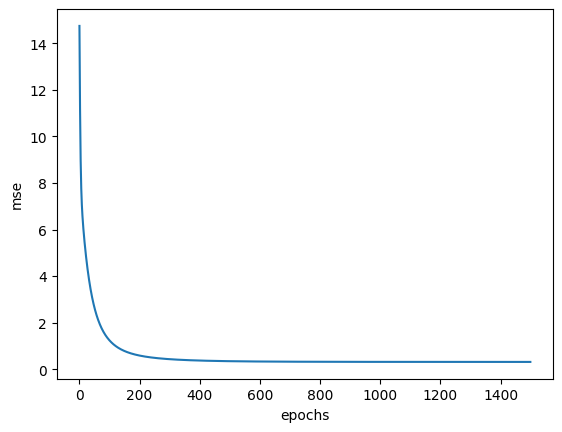

In [12]:
# plot learning curves
plt.figure(1)
plt.plot(range(no_epochs), mse)
plt.xlabel('epochs')
plt.ylabel('mse')

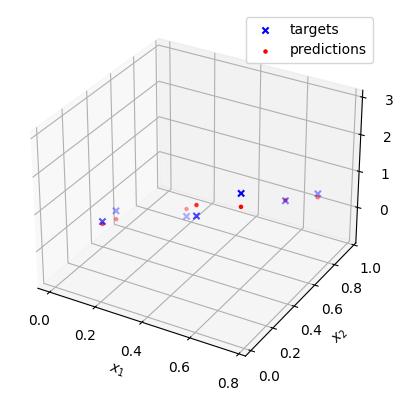

In [13]:
# plot trained and predicted points
fig = plt.figure(3)
ax = plt.axes(projection = '3d')
ax.scatter(X[:,0], X[:,1], Y, color='blue', marker='x', label='targets')
ax.scatter(X[:,0], X[:,1], pred.detach().numpy(), color='red', marker='.', label='predictions')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
ax.legend()

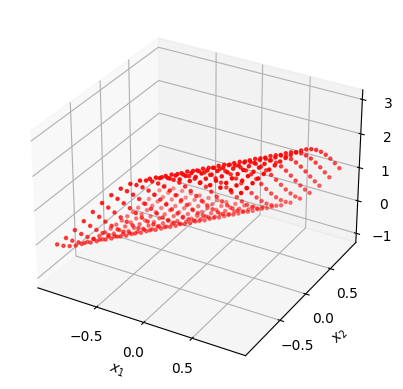

In [14]:
# Plot learned mapping
X1 = np.arange(-1, 1, 0.1)
X2 = np.arange(-1, 1, 0.1)
X = []
for i in range(len(X1)):
  for j in range(len(X2)):
    X.append([X1[i], X2[j]])

X = np.array(X)
_, pred = model(X)

fig = plt.figure(4)
ax = plt.axes(projection = '3d')
ax.scatter(X[:,0], X[:,1], pred.detach().numpy(), color='red', marker='.', label='predictions')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
ax.set_xticks([-0.5, 0, 0.5])
ax.set_yticks([-0.5, 0, 0.5])